In [17]:
use test;

In [18]:
show columns from commiters;

Field Type Null Key Default Extra Datetime datetime YES NULL Name varchar(128) YES NULL Organization varchar(128) YES NULL Email varchar(128) YES NULL Files_Changed int(11) YES NULL Insertions int(11) YES NULL Deletions int(11) YES NULL

### Top 10 Individual Commiters 2009-2019

In [27]:
select Name,
       count(*) as Total_Commits,
       sum(Files_Changed) as Total_Files_Changed,
       sum(insertions) as Total_Lines_Added,
       sum(Deletions) as Total_Lines_Deleted from commiters
       group by Name
       order by Total_Lines_Deleted DESC
       LIMIT 10;

Name Total_Commits Total_Files_Changed Total_Lines_Added Total_Lines_Deleted Rich Prohaska 3295 16857 1641245 1679692 Sergei Golubchik 2371 24233 3321674 898709 Leif Walsh 1630 19227 984664 559607 John Esmet 732 6776 577154 308288 Kentoku Shiba 112 7460 912196 292222 Oleksandr Byelkin 412 2558 102854 215590 Michael Widenius 880 10761 453814 162051 Yoni Fogel 1338 13050 191542 126006 Marko Mäkelä 1549 7703 126341 113000 Bradley C. Kuszmaul 1058 6734 138879 111201

### See what magic commands are available to get some charts

In [20]:
%lsmagic

Line name help %line The %line magic command follows a syntax very similar to that of DataFrame.plot.line from Pandas. Please refer to this link for an exhaustive list of options: pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html Example: > %line x=column1 y=column2 The whole purpose of this magic command is to allow the user to display the result of the last query (e.g. SELECT, SHOW,...) in a nice and simple matplotlib plot. Internally, the Line class receives the data of the last query from the kernel as a Pandas DataFrame, it generates a plot PNG image, wraps the image into a nice display_data Jupyter message and then sends it further. %bar The %bar magic command follows a syntax very similar to that of DataFrame.plot.bar from Pandas. Please refer to this link for an exhaustive list of options: pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html Example: > %bar x=column1 y=column2 stacked=True The whole purpose of this magic command is to allow the user to display the result of the last query (e.g. SELECT, SHOW,...) in a nice and simple matplotlib plot. Internally, the Bar class receives the data of the last query from the kernel as a Pandas DataFrame, it generates a plot PNG image, wraps the image into a nice display_data Jupyter message and then sends it further. %pie The %pie magic command follows a syntax very similar to that of DataFrame.plot.pie from Pandas. Please refer to this link for an exhaustive list of options: pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html Example: > %pie y=column_name The whole purpose of this magic command is to allow the user to display the result of the last query (e.g. SELECT, SHOW,...) in a nice and simple matplotlib plot. Internally, the Pie class receives the data of the last query from the kernel as a Pandas DataFrame, it generates a plot PNG image, wraps the image into a nice display_data Jupyter message and then sends it further. %df The %df magic command has the following syntax: > %df [filename] It writes the result of the last query executed in the notebook into an external CSV formatted file. The purpose of this magic command is to allow users to export query data from their MariaDB databases and then quickly import it into a Python Notebook where more complex analytics can be performed. If no arguments are specified, the kernel writes the data into a CSV file named 'last_query.csv'. %lsmagic The %lsmagic magic command prints the magics currently supported by the kernel. It also prints the help text for each command Cell

### Proportion of Total Commits for Top 10 Contributors

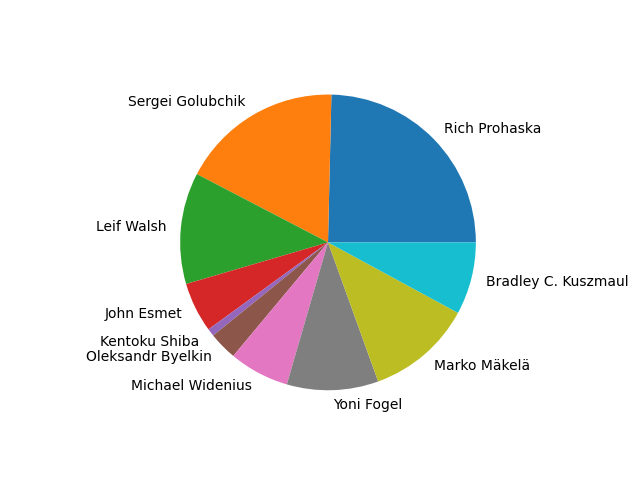

In [21]:
%pie y='Total_Commits' index='Name' legend=False ylabel=''

### Let's see some GitHub Pull Request statistics for MariaDB/server

In [22]:
select * from github_prs limit 1;

row state id title url createdAt updatedAt closedAt labels number authorAssociation author mergedBy mergeCommit comments org repo 0 MERGED MDExOlB1bGxSZXF1ZXN0MzU4MjA5MTE1 MDEV-20732 Correctly set the length of the FORMAT() result for float data type as argument. https://github.com/MariaDB/server/pull/1431 2019-12-30T20:30:10Z 2020-01-16T07:46:59Z 2020-01-16T07:46:59Z {"edges": []} 1431 CONTRIBUTOR tntnatbry {"login": "robertbindar"} {"oid": "f0ca9bc669c742bab5a122e4caddb4b12a8c6c45"} {"edges": [{"node": {"authorAssociation": "NONE "createdAt": "2019-12-30T20:30:26Z" "updatedAt": "2020-01-15T14:52:17Z"

### The most prolific PRs creators

In [23]:
select author,
       count(*) as Number_Of_PRs
       from github_prs
       group by author
       order by Number_Of_PRs DESC
       limit 10;

author Number_Of_PRs grooverdan 384 kevgs 138 midenok 107 sciascid 74 iangilfillan 57 an3l 45 temeo 40 sjaakola 39 sysprg 35 Kentoku 35

### Contributors Frustration Metric

In [24]:
select author,
       count(*) as PRs_Still_OPEN
       from github_prs
       where state='OPEN'
       group by author
       order by PRs_Still_OPEN DESC
       LIMIT 5;
       

author PRs_Still_OPEN grooverdan 16 midenok 13 an3l 8 FooBarrior 5 robertbindar 4

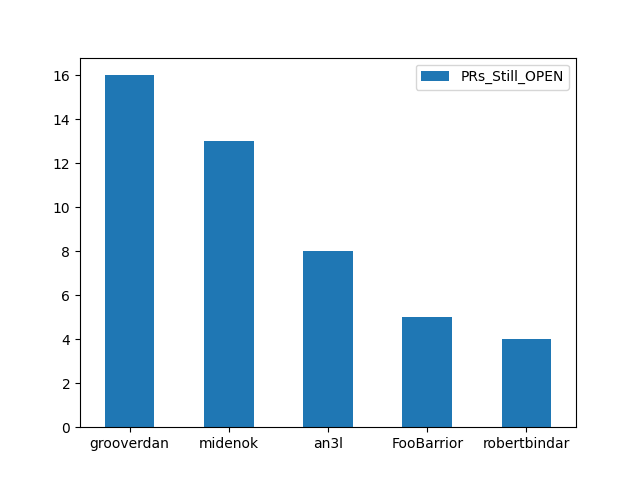

In [25]:
%bar x='author' y='PRs_Still_OPEN' rot=0 xlabel=''

### Want to do real complex stuff?

In [26]:
%df fosdem_dataset.csv

The result set was successfully written into fosdem_dataset.csv


In [28]:
%df dataset2.csv

The result set was successfully written into dataset2.csv
